# Статистика и вероятность. №1 Переменные и метрики

In [26]:
import pandas as pd
import numpy as np

https://drive.google.com/file/d/1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6/view?usp=sharing

In [2]:
! gdown --id 1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6
To: /content/age_children_income_1000.csv
100% 38.8k/38.8k [00:00<00:00, 46.4MB/s]


In [3]:
df = pd.read_csv('/content/age_children_income_1000.csv')

In [5]:
df.head() # Переменные бывают непрерывными (континиум) и дискретными

,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419


In [15]:
df['number_of_children'].value_counts() # посмотрим на распределение дискретной переменной

0    658
1    226
2     94
3     20
5      1
4      1
Name: number_of_children, dtype: int64

In [10]:
df['number_of_children'].value_counts(normalize=True) # ...в долях

0    0.658
1    0.226
2    0.094
3    0.020
5    0.001
4    0.001
Name: number_of_children, dtype: float64

<AxesSubplot:>

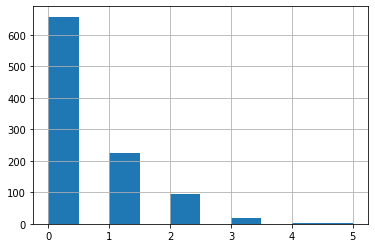

In [11]:
df['number_of_children'].hist()

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='number_of_children', ylabel='Count'>

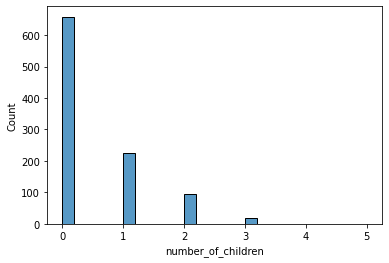

In [13]:
sns.histplot(df['number_of_children'])

<AxesSubplot:xlabel='number_of_children', ylabel='Probability'>

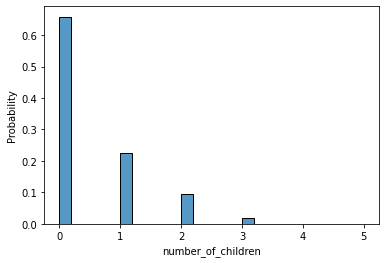

In [14]:
sns.histplot(df['number_of_children'], stat='probability')

In [18]:
df['age'].value_counts() # непрерывную переменную разобьём на интервалы и посмотрим на распеределение

42.772420    1
29.524914    1
23.576408    1
40.563444    1
41.557756    1
            ..
63.789406    1
27.576455    1
28.502233    1
30.699148    1
46.662848    1
Name: age, Length: 1000, dtype: int64

<AxesSubplot:>

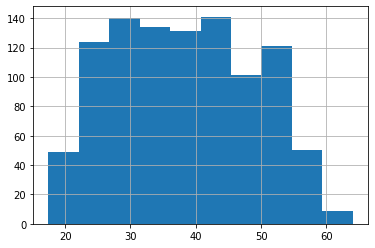

In [19]:
df['age'].hist() # 10 равных диапазонов

<AxesSubplot:xlabel='age', ylabel='Count'>

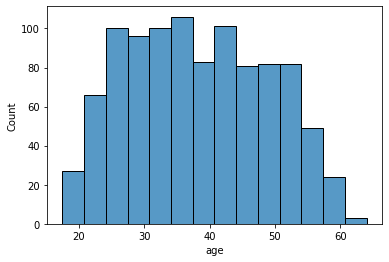

In [20]:
sns.histplot(df['age'])

In [23]:
df['age_bin'] = pd.cut(df['age'], 10) # разбинение на 10 равных диапазонов от min до max

In [24]:
df.groupby('age_bin')['age'].count()

age_bin
(17.402, 22.107]     49
(22.107, 26.766]    124
(26.766, 31.425]    140
(31.425, 36.084]    134
(36.084, 40.743]    131
(40.743, 45.401]    141
(45.401, 50.06]     101
(50.06, 54.719]     121
(54.719, 59.378]     50
(59.378, 64.037]      9
Name: age, dtype: int64

In [28]:
df['number_of_children'].mean() # среднее

0.483

In [30]:
df['age'].mean() # по сути своей просто СУММА, делящаяся на константу

38.31925590719966

In [31]:
df.mean()

<ipython-input-31-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age                       38.319256
number_of_children         0.483000
income                129415.746378
dtype: float64

# Проблема Билла Гейтса

In [32]:
salary = pd.Series([30, 30, 40, 60, 50])

In [33]:
salary

0    30
1    30
2    40
3    60
4    50
dtype: int64

In [34]:
salary.mean()

42.0

In [35]:
salary = pd.Series([30, 30, 40, 60, 50, 999999999])

In [39]:
salary.mean() # все стали миллионерами? :D

166666701.5

<AxesSubplot:>

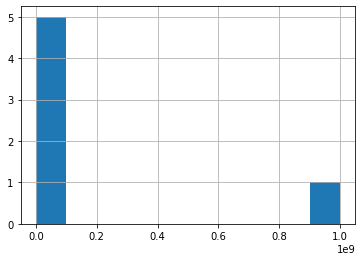

In [38]:
salary.hist() # перекошенное распределение

In [40]:
salary = pd.Series([30, 30, 40, 60, 50])

In [41]:
salary.median()

40.0

In [42]:
salary = pd.Series([30, 30, 40, 60, 50, 999999999])

In [43]:
salary.median()

45.0

In [46]:
salary = pd.Series([30, 30, 60, 30, 40, 50])

In [50]:
salary.median() # у 50% наблюдений в выборке значение зарплаты меньше, чем медиана. В маленьких выборках может быть и 40% и 60%, любое значение играет роль

35.0

In [52]:
df['income'].median()

114586.57093898312

In [130]:
(df['income'] < df['income'].quantile(0.5)).mean() # Проверка на квантиль (полезно). Выборка большая, поэтому получилось ровно 50%

0.5

In [57]:
df['income'].agg(['mean', 'median'])

mean      129415.746378
median    114586.570939
Name: income, dtype: float64

<AxesSubplot:>

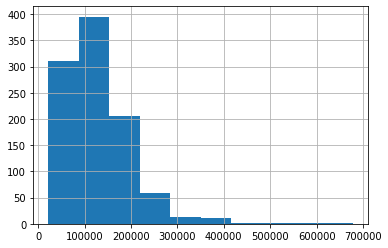

In [58]:
df['income'].hist()

In [70]:
(df['income'] < 114586.57093898312).mean() # квантиль

0.5

In [63]:
True + True

2

In [64]:
False + False

0

In [69]:
(df['income'] < 100000).mean() # квантиль 0.397

0.397

In [67]:
df['income'].quantile(0.4)

100512.68685217279

In [68]:
(df['income'] < df['income'].quantile(0.4)).mean()

0.4

In [71]:
df['income'].quantile(0.1)

58377.17440989983

In [73]:
df

,age,number_of_children,income,age_bin
0,42.772420,0,34396.537188,"(40.743, 45.401]"
1,29.561090,0,183350.052521,"(26.766, 31.425]"
2,54.380735,0,53689.856555,"(50.06, 54.719]"
3,42.551689,0,109080.913926,"(40.743, 45.401]"
4,38.713080,0,153612.343419,"(36.084, 40.743]"
...,...,...,...,...
995,36.281055,0,128647.922872,"(36.084, 40.743]"
996,18.472716,0,67204.531673,"(17.402, 22.107]"
997,40.547748,0,139432.757984,"(36.084, 40.743]"
998,24.791760,1,137526.452334,"(22.107, 26.766]"


In [74]:
df['pct'] = df['age'].rank(pct=True)

In [75]:
df

,age,number_of_children,income,age_bin,pct
0,42.772420,0,34396.537188,"(40.743, 45.401]",0.639
1,29.561090,0,183350.052521,"(26.766, 31.425]",0.257
2,54.380735,0,53689.856555,"(50.06, 54.719]",0.936
3,42.551689,0,109080.913926,"(40.743, 45.401]",0.634
4,38.713080,0,153612.343419,"(36.084, 40.743]",0.521
...,...,...,...,...,...
995,36.281055,0,128647.922872,"(36.084, 40.743]",0.458
996,18.472716,0,67204.531673,"(17.402, 22.107]",0.007
997,40.547748,0,139432.757984,"(36.084, 40.743]",0.570
998,24.791760,1,137526.452334,"(22.107, 26.766]",0.119


In [78]:
(df['age'] < 42.772420).mean() # Есть расхождение с 0 строкой, где pct=0.639. 64% моложе, чем 42.772420	

0.638

# Коробка с усами

<AxesSubplot:>

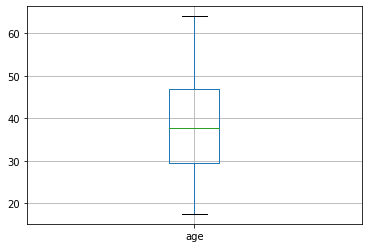

In [131]:
df.boxplot('age') # Коробка с усами (подходит для симметричного (нормального) распределения).
# Изображает важные процентили (квантили): 0.25, 0.5, 0.75, 1. Межквартильный размах: между 1 и 3 квартилем
# Само же расстояние между усами = 1,5 межквартильных размахов
# Межквартильный размахи удобны для оценки симметричного распределения
# Важно! 1.7 Межквартильный размахов = 3 сигмы = 99% наблюдений!

<AxesSubplot:>

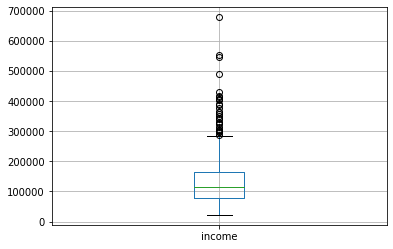

In [86]:
df.boxplot('income') # присутствует много выбросов по мнению boxplot

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

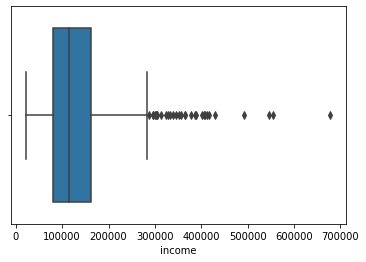

In [87]:
sns.boxplot(df['income'])

<AxesSubplot:>

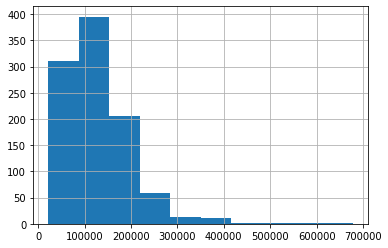

In [88]:
df['income'].hist()

In [89]:
# Виден четкий перекос влево

# Вместо STD используй MAD

In [95]:
df['income'].describe()

count      1000.000000
mean     129415.746378
std       71251.620971
min       21943.855414
25%       79594.040400
50%      114586.570939
75%      162888.891081
max      678006.351857
Name: income, dtype: float64

In [100]:
# std - мера разброса (отклонение от среднего)

In [97]:
pd.options.display.max_rows = 100

In [98]:
df['income']

0       34396.537188
1      183350.052521
2       53689.856555
3      109080.913926
4      153612.343419
           ...      
995    128647.922872
996     67204.531673
997    139432.757984
998    137526.452334
999    148449.261137
Name: income, Length: 1000, dtype: float64

In [99]:
df['income'].mean()

129415.74637843431

In [115]:
(df['income'] - df['income'].mean()) # среднее отклонение

0     -95019.209190
1      53934.306143
2     -75725.889823
3     -20334.832452
4      24196.597041
           ...     
995     -767.823506
996   -62211.214705
997    10017.011605
998     8110.705955
999    19033.514759
Name: income, Length: 1000, dtype: float64

In [114]:
(df['income'] - df['income'].mean()).mean() # отклонение от среднего как бы отменяет среднее и -> 0

5.1222741603851315e-12

In [113]:
(df['income'] - df['income'].mean()).abs().mean() # мы нашли среднее абсолютное отклонение, НООО STD ЭТО ДРУГОЕ

51910.29730549474

In [108]:
((df['income'] - df['income'].mean()) ** 2).mean() # дисперсия, а std это корень из дисперсии

5071716697.45695

In [116]:
np.sqrt(((df['income'] - df['income'].mean()) ** 2).mean()) # почти std. Осталось учесть степень свободы, то есть поделить не на len(df), а на len(df) - 1

71215.98624927517

In [112]:
np.sqrt(((df['income'] - df['income'].mean()) ** 2).sum() / (len(df) - 1)) # ТЕПЕРЬ МЫ НАШЛИ STD

71251.62097066913

In [117]:
# По факту std нужно только для математических моделей, которые основаны на нормальном распределении. Когда же у нас есть жирный хвост как тут:

<AxesSubplot:>

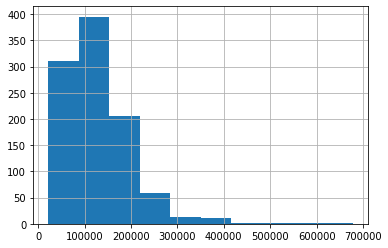

In [118]:
df['income'].hist()

In [121]:
# то для такого анализа оно нам НЕ НУЖНО! Отклонение значений в переменных в std имеет гораздо больший вес, чем в абсолютном среднем отклонении. Пример: 10 - 2 = 8, а 100 -4 = 96

# Корреляция

In [125]:
df[['age', 'income']].corr() # корреляция (метод Пирсона) находит только линейную зависимость. Будь у нас зависимость вида x^2, то корреляция показала бы 0

,age,income
age,1.000000,-0.048164
income,-0.048164,1.000000


In [127]:
df.groupby('age_bin')['income'].agg(['count', 'mean', 'median']) # Сводник намного практичнее!

,count,mean,median
age_bin,,,
"(17.402, 22.107]",49,104319.382165,88163.526875
"(22.107, 26.766]",124,133775.791324,125960.906191
"(26.766, 31.425]",140,130575.738767,114947.477353
"(31.425, 36.084]",134,135654.848704,118368.874351
"(36.084, 40.743]",131,134457.081592,128647.922872
"(40.743, 45.401]",141,139697.676942,123441.920529
"(45.401, 50.06]",101,142814.622910,122199.047306
"(50.06, 54.719]",121,112563.104588,95443.103632
"(54.719, 59.378]",50,104040.538214,91602.734609


<AxesSubplot:xlabel='age_bin'>

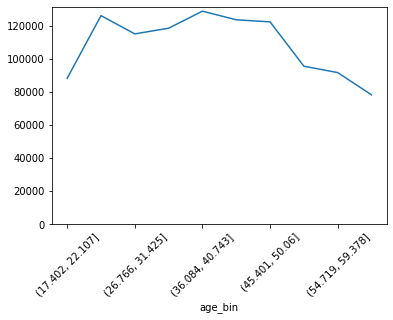

In [129]:
df.groupby('age_bin')['income'].median().plot(rot=45, ylim=0)

<AxesSubplot:xlabel='age', ylabel='income'>

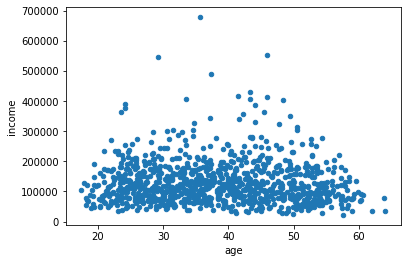

In [134]:
df.plot(x='age', y='income', kind='scatter') # видна нелинейность взаимосвязи, что-то типа -x^2

## Пример поиска взаимосвязи

In [138]:
df.groupby('number_of_children')['income'].agg(['count', 'mean', 'median'])

,count,mean,median
number_of_children,,,
0,658,126715.541703,110189.980527
1,226,132978.451169,124840.813434
2,94,130142.466654,113863.126537
3,20,175810.993223,112983.579288
4,1,134556.798410,134556.798410
5,1,99621.445364,99621.445364


<AxesSubplot:xlabel='number_of_children'>

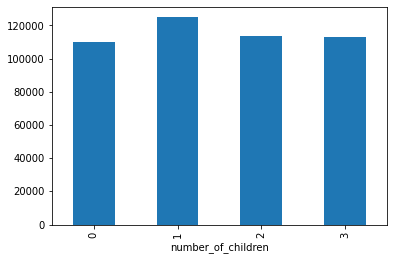

In [139]:
df.groupby('number_of_children')['income'].median().head(4).plot(kind='bar')

In [141]:
df[['number_of_children', 'income']].corr()

,number_of_children,income
number_of_children,1.000000,0.065774
income,0.065774,1.000000


<AxesSubplot:xlabel='number_of_children', ylabel='income'>

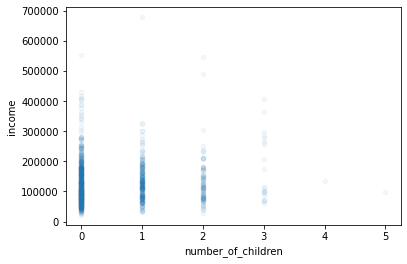

In [144]:
df.plot(x='number_of_children', y='income', kind='scatter', alpha=0.05)

<AxesSubplot:title={'center':'income'}, xlabel='number_of_children'>

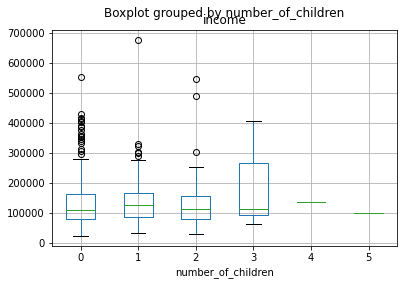

In [145]:
df.boxplot('income', by='number_of_children')